# Multioutput classification
- 여기서 multioutput이란 predict한 결과 값의 종류가 2개 (True/False) 이상인 경우를 의미한다
- 예를 들어 noisy한 글자 이미지를 input으로 받아 그것에서 진짜 글자에 해당하는 것들만 255로 리턴하고 나머지는 0혹은 그에 가깝게 리턴하는 classifier라던지
    - 사실 이쯤 되면 classifier라기 보다는 denoising filter같은 느낌이긴 한데

In [1]:
import matplotlib
import matplotlib.pyplot
import pathlib
import sklearn.datasets
import sklearn.linear_model
import sklearn.model_selection

matplotlib.pyplot.rc('font', size=14)
matplotlib.pyplot.rc('axes', labelsize=14, titlesize=14)
matplotlib.pyplot.rc('legend', fontsize=14)
matplotlib.pyplot.rc('xtick', labelsize=10)
matplotlib.pyplot.rc('ytick', labelsize=10)

output_dir = pathlib.Path() / "images" / "end_to_end_project"
output_dir.mkdir(parents=True, exist_ok=True)
print(f'output_dir : {output_dir}')

def matplotlib_to_imagefile(output_dir, filename, imgext="png", tight_layout=True, resolution=300):
    path = output_dir / f"{filename}.{imgext}"
    if tight_layout:
        matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.savefig(path, format=imgext, dpi=resolution)

# 28 * 28 = 784
def plot_digit(vec_784):
    image = vec_784.reshape(28, 28)
    matplotlib.pyplot.imshow(image, cmap='binary')
    matplotlib.pyplot.axis('off')


dataset_save_dir = pathlib.Path("datasets")
mnist = sklearn.datasets.fetch_openml('mnist_784', data_home=dataset_save_dir, as_frame=False)
X, y = mnist.data, mnist.target
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1, stratify = y)

output_dir : images\end_to_end_project


c:\Users\ctint\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
import numpy

noise = numpy.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = numpy.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

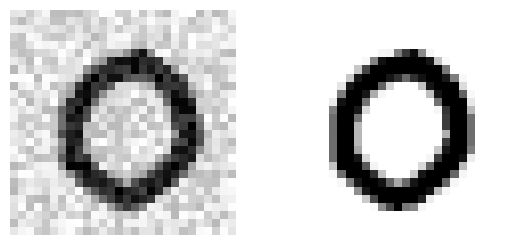

In [4]:
matplotlib.pyplot.subplot(121)
plot_digit(X_test_mod[0])
matplotlib.pyplot.subplot(122)
plot_digit(y_test_mod[0])
matplotlib.pyplot.show()

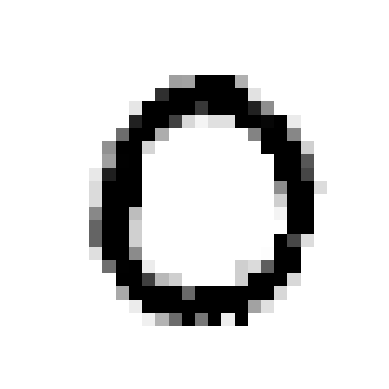

In [5]:
import sklearn.neighbors

knn_clf = sklearn.neighbors.KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
matplotlib.pyplot.show()